In [1]:
# pandas - pydata

In [2]:
# http://pandas.pydata.org

In [3]:
import pandas as pd

In [4]:
pd

<module 'pandas' from '/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/__init__.py'>

In [5]:
# DataFrame 이라는 자료형

In [6]:
pd.read_csv("dss.csv")

,adamsta0109,terrya@contoso.edu,Terry,Adams,1091990
0,beebeab0211,annb@contoso.edu,Ann,Beebe,2111991
1,cannocc0328,chrisc@contoso.edu,Chris,Cannon,3281986
2,desaipd0430,prashanthd@contoso.edu,Prashanth,Desi,4301989
3,ersanee0529,ebrue@contoso.edu,Ebru,Ersan,5291988
4,flipffo0628,florencef@contoso.edu,Florence,Flipo,6281989
5,garciadg0726,debrag@contoso.edu,Debra,Garcia,7271986
6,halbeph0826,pernilleh@contoso.edu,Pernille,Halberg,8261986
7,ilyinji0925,julial@contoso.edu,Julia,Ilyina,9251985
8,johnstj1024,tamaraj@contoso.edu,Tamara,Johnston,10241987


In [7]:
# pd.read_excel
# pd.read_sql

In [8]:
df = pd.DataFrame()

In [9]:
df

""


In [10]:
df = pd.DataFrame(columns=["address", "deposit", "rent", "phonenumber"])
df

,address,deposit,rent,phonenumber


In [11]:
df.loc[0] = ["주소", 1000, 100, "01023433234"]

In [12]:
df

,address,deposit,rent,phonenumber
0,주소,1000,100,01023433234


In [13]:
df.loc[0]

address                 주소
deposit               1000
rent                   100
phonenumber    01023433234
Name: 0, dtype: object

In [14]:
df.loc[1] = ["주소", 1000, 100, "01023433234"]

In [15]:
len(df)

2

In [16]:
df.loc[len(df)] = ["주소", 1000, 100, "01023433234"]

In [17]:
df

,address,deposit,rent,phonenumber
0,주소,1000,100,01023433234
1,주소,1000,100,01023433234
2,주소,1000,100,01023433234


In [18]:
df.head(2)

,address,deposit,rent,phonenumber
0,주소,1000,100,01023433234
1,주소,1000,100,01023433234


In [19]:
df.tail()

,address,deposit,rent,phonenumber
0,주소,1000,100,01023433234
1,주소,1000,100,01023433234
2,주소,1000,100,01023433234


In [20]:
df.tail(1)

,address,deposit,rent,phonenumber
2,주소,1000,100,01023433234


In [21]:
df.loc[0:2]

,address,deposit,rent,phonenumber
0,주소,1000,100,01023433234
1,주소,1000,100,01023433234
2,주소,1000,100,01023433234


In [1]:
import requests
import json
import pandas as pd

for i in range(1):
    start_room_id = 100000 + (i * 100) + 1
    end_room_id = 100000 + ((i + 1) * 100)
    # &item_ids=[ _____ , _____ ... ]
    
    BASE_URL = "https://api.zigbang.com/v3/items?detail=true&item_ids=["
    
    result_url = BASE_URL + ",".join([
        str(room_id)
        for room_id in range(start_room_id, end_room_id + 1)
    ]) + "]"
    
    
def get_df_from_zigbang(url):
    response = requests.get(url)
    zigbang_dict = json.loads(response.text)
    df = pd.DataFrame(columns=["address", "deposit", "rent", "phonenumber"])
    for item in zigbang_dict.get('items'):
        room_information = item.get('item')
        try:
            address = room_information.get('agent_address1')
            deposit = float(room_information.get('deposit'))
            rent = float(room_information.get('rent'))
            phonenumber = room_information.get('original_user_phone')
            print((address, deposit, rent, phonenumber))
            df.loc[len(df)] = [address, deposit, rent, phonenumber]
        except:
            pass
        
    return df


In [2]:
# get_df_from_zigbang("https://api.zigbang.com/v3/items?detail=true&item_ids=[11469344]")

In [3]:
# 강남구 신사동 ( df1 )
# 관악구 신림동 ( df2 )
df_shinsa = get_df_from_zigbang("https://api.zigbang.com/v3/items?detail=true&item_ids=[12999468,12774503,12925736,13007247,12997361,12813102,12879714,12953412,12738505,12914453,12936055,12978033,12899289,12986963,12850223,12995912,12932899,12892525,13003424,12927127,12864775,12910545,12970577,13008724,12983850,12946907,12867774,12977348,12942035,13001738,12685467,12833873,12855788,12964357,12801324,12836859,12822436,12799130,12947272,12834848,12844042,12954561,12932602,12766881,12932898,12978017,12992113,12870739,12713338,12982968,12757812,12901651,12967437,13004638,12996415,12979917,12960812,12949643,12949622,12747054]")

df_shinlim = get_df_from_zigbang("https://api.zigbang.com/v3/items?detail=true&item_ids=[12956817,12970980,12828574,12950943,13009768,13007022,12992365,12987217,12889890,12936912,12969503,13000626,12952584,13003179,12963008,13000520,12836298,12735357,12866603,12962778,12953707,13002531,13005453,12948770,13004243,12837060,12914568,12958452,12957702,12943403,12981553,12967120,12871107,12987844,13007531,12999166,13000211,12836742,12974744,12969879,12999806,12934152,12991289,12948662,12998887,13001562,12910587,12982103,12978769,13009962,12962559,12972486,13000200,13005425,13009201,12862152,12691479,13008270,12916047,12920110]")

('서울특별시 서초구 사평대로53길 14-1, 1층(반포동)', 1000.0, 60.0, '010-2520-1799')
('서울특별시 강남구 테헤란로33길 38 1층', 2000.0, 140.0, '010-7191-0902')
('서울특별시 강남구 신사동 516-9', 3000.0, 180.0, '010-3586-8979')
('서울특별시 강남구 논현동 148-2', 1000.0, 115.0, '010-9102-2074')
('서울특별시 강남구 도곡로33길 24 1층 101호(역삼동)', 90.0, 90.0, '010-6635-2455')
('서울특별시 강남구 역삼동 823번지 106호', 72.0, 72.0, '010-6241-0183')
('서울시 강남구 논현로151길 16 101호', 1000.0, 75.0, '010-8981-4016')
('서울특별시 서초구 사평대로53길 14-1, 1층(반포동)', 20000.0, 20.0, '010-9138-1122')
('서울특별시 강남구 도곡로33길 24 1층 101호(역삼동)', 65.0, 65.0, '010-4181-8019')
('서울특별시 강남구 언주로97길 34 101호', 500.0, 40.0, '010-4630-0082')
('서울특별시 강남구 테헤란로47길 25 1층', 120.0, 120.0, '010-4842-4123')
('서울특별시 강남구 역삼동 825-20 푸르지오시티 B124호', 120.0, 120.0, '010-7358-3690')
('서울시 강남구 역삼동 610-2', 20000.0, 100.0, '010-7318-0047')
('서울시 강남구 역삼로 216 1층', 10000.0, 50.0, '010-2992-3778')
('서울특별시 강남구 테헤란로51길 46-12', 4000.0, 50.0, '010-2470-1230')
('서울특별시 강남구 논현동 148-2', 3000.0, 110.0, '010-8906-3677')
('서울특별시 강남구 논현로 522 1층', 2000.0,

In [6]:
df_shinlim.mean()

deposit    5533.813559
rent         25.440678
dtype: float64

In [7]:
df_shinlim.head()

,address,deposit,rent,phonenumber
0,서울특별시 관악구 신림동5길 38 101호(신림동),1000.0,55.0,010-2355-3421
1,서울특별시 관악구 신림로66길 36,16000.0,0.0,010-8961-4476
2,서울시 관악구 신림동 1414-16,10000.0,0.0,010-9972-8583
3,서울특별시 관악구 신림동5길 38 101호(신림동),500.0,30.0,010-2355-3421
4,서울특별시 관악구 신림로68길 29,200.0,35.0,010-2403-7753


In [8]:
!pip install --upgrade pip
!pip install matplotlib

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (18.1)


In [9]:
df_shinlim.mean()

deposit    5533.813559
rent         25.440678
dtype: float64

In [10]:
df_shinlim.describe()

,deposit,rent
count,59.000000,59.000000
mean,5533.813559,25.440678
std,8012.169695,22.976203
min,45.000000,0.000000
25%,150.000000,0.000000
50%,1000.000000,29.000000
75%,8750.000000,35.000000
max,30000.000000,100.000000


In [11]:
df_shinlim["deposit"].mean()

5533.813559322034

In [12]:
# 평균
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f598b3186d8>]],
      dtype=object)

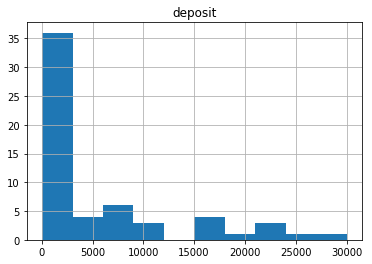

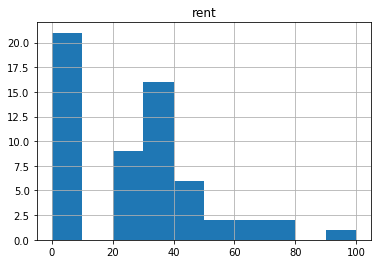

In [15]:
# df_shinsa.hist() 
# 그래프를 나눠서 뽑을때는 
df_shinlim.hist("deposit")
df_shinlim.hist("rent")

# df_shinlim.hist("deposit", color="Red", title="Deposit of Shinlim")



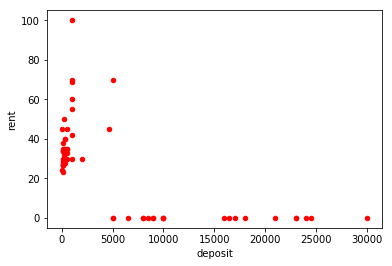

In [16]:
df_shinlim.plot.scatter(x="deposit", y="rent", color="Red")

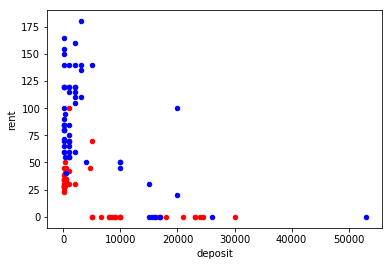

In [17]:
ax = df_shinlim.plot.scatter(x="deposit", y="rent", color="Red")
df_shinsa.plot.scatter(x="deposit", y="rent", color="Blue", ax=ax)